# Portfolio Methodolgy

1. DGI - Rebalance every 6 months picking around 10 - 30 names from CA and US universe
    - Add names slowly, 2-3 names a month
    - **GTC Stop Limit of 5% on each name**
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: MU AMD MSFT TTWO
    - AMD Earnings: Oct 22
    - MSFT Earnings: Oct 24
    - TTWO Earnings: Nov 5
    - MU Earnings: Dec 17
        - **Exit Criteria: When the call option drops below 60 delta**
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
    - **Short ATM SPX Put spreads around 25 points wide**
        - **Long bi-weekly unit puts, around -7% or so of SPX spot (or something with a cost of 15% of the credit)**
        - **The SPX put spread will have a capped max loss of 2,500 per contract, while in low volatility, the bi-weekly units are severely underpriced and will explode 10X to 20X in value if the long strike in the spread gets tested. Vega and Gamma play a huge factor in the repricing of these units.**
        - Initiate the units every 2 weeks letting them run to expiry
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|VAA/PAA|25%|11/01/2018|12/01/2018|12/01/2018|
|LEAPs|5%|11/01/2018|12/01/2018|01/01/2019|
|Short Vol|2%|NA|NA|NA|
|Barbell Hedging|1.5%|10/22/2018|10/24/2018|10/29/2018|
|Treasuries|60%|11/01/2018|11/29/2018|12/01/2018|

## Key Modules to Run

- fundamental_data_collect.py to run monthly to collected latest financial statements and key stats from yahoo
- finstatement_cleaning.py to run right after fundamental_data_collect.py to create cleaned data for earnings plays



In [1]:
# Importing necessary models
import warnings
warnings.filterwarnings('ignore')

import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *
from option_slam_earnings import *
from reuters_query import reuters_query

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Earnings')
from yahoo_earnings import *
from new_earnings_setup import *

os.chdir(main_dir)

C:\Users\Fang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



# Allocate Smartly Checking

In [2]:
# Short Call Assignment Price - 287.5

portfolio_value =  300000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

Allocation    price  Market Value  Holdings
symbol                                             
DBC          0.014   16.880        4200.0     249.0
HYG          0.014   84.255        4200.0      50.0
IEF          0.417  100.175      125100.0    1249.0
IWM          0.014  152.935        4200.0      27.0
LQD          0.500  111.975      150000.0    1340.0
QQQ          0.014  167.665        4200.0      25.0
SPY          0.014  271.790        4200.0      15.0
VNQ          0.014   78.875        4200.0      53.0

## Checking market correlations

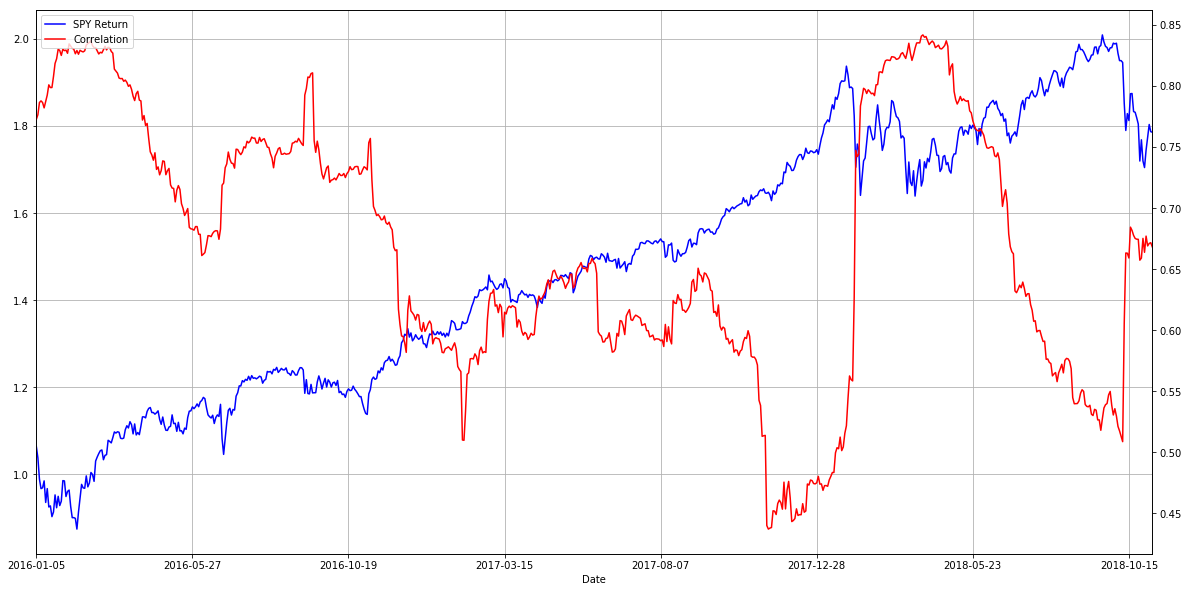

                XLRE       XLV       XLI       XLK       XLE       XLU  \
2018-10-30  0.432195  0.915944  0.850794  0.915956  0.729119  0.019087   
2018-10-31  0.395356  0.908453  0.852474  0.916932  0.729650 -0.006917   
2018-11-01  0.399878  0.910993  0.856426  0.917836  0.734797 -0.016608   
2018-11-02  0.404528  0.911463  0.855520  0.914758  0.735113 -0.010320   
2018-11-05  0.394213  0.908860  0.854410  0.910291  0.741053 -0.014919   

                 XLB       XLP       XLF       XLY  Avg_Corr   SPY_cum  
2018-10-30  0.753220  0.441545  0.808454  0.904015  0.677033  1.744600  
2018-10-31  0.759625  0.415250  0.813259  0.906124  0.669021  1.773914  
2018-11-01  0.759765  0.427726  0.812704  0.907035  0.671055  1.803434  
2018-11-02  0.761571  0.431493  0.811104  0.901108  0.671634  1.786829  
2018-11-05  0.759688  0.427110  0.804210  0.896806  0.668172  1.785804  


In [3]:
rolling_window = 60
plot_window = 10000

corr_df, sector_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

In [4]:
((sector_df.dropna() + 1).cumprod()-1).tail()

SPY      XLRE       XLV       XLI       XLK       XLC  \
2018-10-30 -0.028058  0.032698  0.043837 -0.052984 -0.052359 -0.097078   
2018-10-31 -0.017677  0.018730  0.045251 -0.045746 -0.029819 -0.078463   
2018-11-01 -0.007223  0.022540  0.058449 -0.028950 -0.018480 -0.073058   
2018-11-02 -0.013103  0.013968  0.051850 -0.030589 -0.037659 -0.082466   
2018-11-05 -0.013466  0.026667  0.057742 -0.031681 -0.048439 -0.089071   

                 XLE       XLU       XLB       XLP       XLF       XLY  
2018-10-30 -0.106904  0.082487 -0.112669  0.087544 -0.052285 -0.069243  
2018-10-31 -0.101418  0.069735 -0.100530  0.077360 -0.039122 -0.057255  
2018-11-01 -0.093792  0.064953 -0.075227  0.084998 -0.034735 -0.038021  
2018-11-02 -0.096066  0.058976 -0.077449  0.079318 -0.035466 -0.034085  
2018-11-05 -0.086165  0.067244 -0.081381  0.086173 -0.026464 -0.042315

## Earnings

**Key modules to run**
- new_earnings_setup.py for given date in string form 'yyyy-mm-dd': this gives the latest input data for earnings_prediction
- earnings_prediction.py for determining position to take on earnings name

In [10]:
date_lookup = '2018-11-05'
file_date = '2018-10-20'
return_bounds = 0.03
test_size = 0.8

predictions, earnings_rets = predict_earnings(date_lookup, file_date, return_bounds, test_size)

Accepted: TWOU
0.43% Completed
0 total failures
Accepted: NAT
0.85% Completed
0 total failures
Accepted: RYAM
1.28% Completed
0 total failures
Accepted: ALSK
1.70% Completed
0 total failures
Accepted: AVD
2.13% Completed
0 total failures
Accepted: AY
2.55% Completed
0 total failures
Accepted: FOLD
2.98% Completed
0 total failures
Accepted: ARGO
3.40% Completed
0 total failures
Accepted: RCII
3.83% Completed
0 total failures
Accepted: BBW
4.26% Completed
0 total failures
Accepted: APTS
4.68% Completed
0 total failures
Accepted: AAOI
5.11% Completed
0 total failures
Accepted: ATHM
5.53% Completed
0 total failures
Accepted: AKCA
5.96% Completed
0 total failures
Accepted: ATUS
6.38% Completed
0 total failures
Accepted: AWR
6.81% Completed
0 total failures
Accepted: APLE
7.23% Completed
0 total failures
Accepted: ACHC
7.66% Completed
0 total failures
Accepted: AVDL
8.09% Completed
0 total failures
Accepted: ALDR
8.51% Completed
0 total failures
Accepted: ACRX
8.94% Completed
0 total failure

Failed: HUD
72.34% Completed
25 total failures
Accepted: RNET
72.77% Completed
25 total failures
Accepted: OUT
73.19% Completed
25 total failures
Accepted: ITRI
73.62% Completed
25 total failures
Accepted: RGLS
74.04% Completed
25 total failures
Accepted: MATX
74.47% Completed
25 total failures
Accepted: INPX
74.89% Completed
25 total failures
Accepted: TTWO
75.32% Completed
25 total failures
Failed: MRIC
75.74% Completed
26 total failures
Accepted: MWA
76.17% Completed
26 total failures
Accepted: P
76.60% Completed
26 total failures
Accepted: KMT
77.02% Completed
26 total failures
Accepted: SNGX
77.45% Completed
26 total failures
Accepted: TBI
77.87% Completed
26 total failures
Accepted: SNSS
78.30% Completed
26 total failures
Accepted: OTIC
78.72% Completed
26 total failures
Accepted: OTIC
79.15% Completed
26 total failures
Accepted: PRTO
79.57% Completed
26 total failures
Accepted: VSTM
80.00% Completed
26 total failures
Failed: LASR
80.43% Completed
27 total failures
Accepted: TCMD

In [11]:
acs = predictions[(predictions['Expected Return'] != 0) &
                  (predictions['CallTime'] == 'AC')].drop_duplicates()

bos = predictions[(predictions['Expected Return'] != 0) &
                  (predictions['CallTime'] == 'BO')].drop_duplicates()

In [60]:
focus_names = ['ANDE', 'CAR', 'NBIX', 'DVAX', 'THC', 'IIN', 'JCOM', 'PTCT', 'LPI', 'INSY', 'OAS']

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Data\\Historical Queries\\Earnings')

datenow = dt.datetime.today().strftime('%Y-%m-%d')



acs[acs.Underlying.isin(focus_names)].to_csv('earnings_{}.csv'.format(datenow), index = 0)

acs = pd.read_csv('earnings_{}.csv'.format(datenow), index_col = 0)

os.chdir(main_dir)
acs[acs.Underlying.isin(focus_names)]

Underlying              sector CallTime  IndustryBeta  MarketBeta  \
0        ANDE  Consumer Defensive       AC      0.311002    0.459714   
1         CAR         Industrials       AC      0.694519    0.604081   
2        NBIX          Healthcare       AC      0.423618    0.497529   
3        DVAX          Healthcare       AC      0.173421    0.159447   
4         THC          Healthcare       AC      0.558729    0.558588   
5         IIN          Technology       AC      0.330500    0.360074   
6        JCOM          Technology       AC      0.678576    0.628691   
7        PTCT          Healthcare       AC      0.445981    0.448097   
8         LPI              Energy       AC      0.588611    0.482827   
9        INSY          Healthcare       AC      0.280979    0.285494   
10        OAS              Energy       AC      0.817741    0.606019   

    Stock52WeekReturn  SPY52WeekReturn  Industry52WeekReturn  Expected Return  
0           -0.013197         0.054246              0.050245             0.03  
1           -0.258238         0.053898             -0.010024             0.03  
2            0.493876         0.054246              0.101826             0.03  
3           -0.463426         0.054014              0.102398            -0.03  
4            1.016055         0.054169              0.102193             0.03  
5            2.531381         0.053898              0.072719             0.03  
6           -0.085345         0.053898              0.072767             0.03  
7            1.180046         0.053433              0.101581            -0.03  
8           -0.478846         0.053386             -0.001165             0.03  
9            0.647059         0.053538              0.101703            -0.03  
10          -0.003415         0.053538             -0.001165             0.03

In [ ]:
eps_lst = []
findata_lst = []
keystats_lst = []

eps_cols = ['epsActual',
 'epsDifference',
 'epsEstimate',
 'surprisePercent',
 'Underlying',
 'Quarter',
 'Stock_closeToOpen',
 'EarningsDate']

for ticker in acs.Underlying:
    curr_query = yahoo_query(ticker, dt.datetime(2018,1,1))
    curr_query.full_info_query()

    curr_eps = curr_query.earnings_quarterly
    curr_eps['Underlying'] = ticker
    
    curr_earnings_report = earnings_report(ticker)
    curr_earnings_report.columns = [x.replace(ticker,'Stock') for x in curr_earnings_report.columns[:-1]] + ['52WeekSectorReturn']
    
    curr_eps['Quarter'] = curr_eps.index
    curr_eps = curr_eps.reset_index(drop = True)

    curr_earnings_report = curr_earnings_report.dropna().tail(4)
    curr_earnings_report['EarningsDate'] = curr_earnings_report.index
    curr_earnings_report = curr_earnings_report.reset_index(drop = True)

    curr_eps = curr_eps.join(curr_earnings_report)[eps_cols]
    curr_eps['surprisePercent'] = pd.to_numeric(curr_eps['surprisePercent'])
    
    curr_findata = curr_query.finData
    curr_findata['surpriseReturnCorrelation'] = curr_eps[['surprisePercent','Stock_closeToOpen']].corr().iloc[0,1]
    eps_lst.append(curr_eps)
    findata_lst.append(curr_findata)
    keystats_lst.append(curr_query.keyStats)
    
eps_df = pd.concat(eps_lst, axis = 0)
findata_df = pd.concat(findata_lst, 
                       axis = 0).join(pd.concat(keystats_lst, 
                                                axis = 0).drop(['maxAge', 'profitMargins'], axis=1))

In [ ]:
eps_df

In [ ]:
findata_df

## Barbell Hedging

In [ ]:
ratios = spx_put_backratios(50, 1, 0.2, 2, 25)

In [ ]:
ratios

In [ ]:
spx_options = all_greeks(all_options('^SPX',50,1,0.2))
spx_options = spx_options[(spx_options['Type'] == 'put') &
                          (spx_options['Strike'] < spx_options['Underlying_Price'])]

In [ ]:
spx_options[(spx_options['DTE'] == 7) &
            (spx_options['Strike'] == 2390.0)]